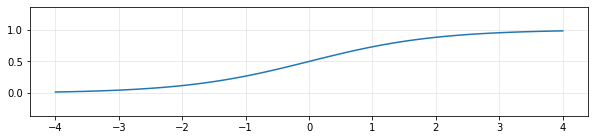

In [4]:
# plot a sigmoid function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize=(10,2))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

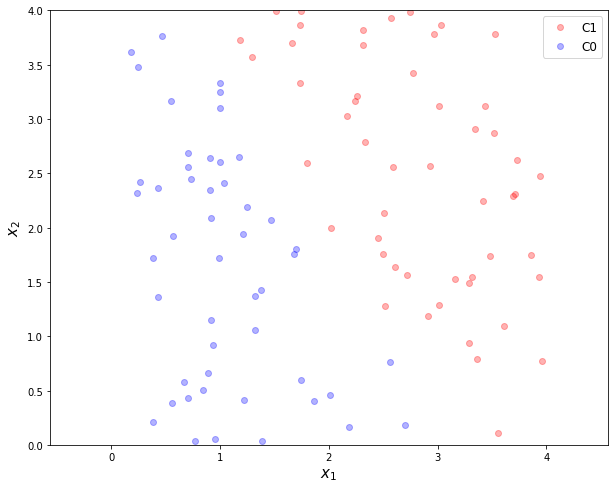

In [18]:
# Logistic Regression using Gradient Descent
# datat generation

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1+np.exp(-X*w)) > 0.5
C1 = np.where(y == True)[0]
C0 = np.where(y == False)[0]

y = np.empty([m,1])
y[C1] = 1
y[C0] = 0

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [19]:
# be careful with matrix shape

def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [20]:
w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df = X.T*(y-h(X,w))
    w = w - alpha*(-df)
print(w)

[[-29.72432117]
 [  9.6319395 ]
 [  5.58225025]]


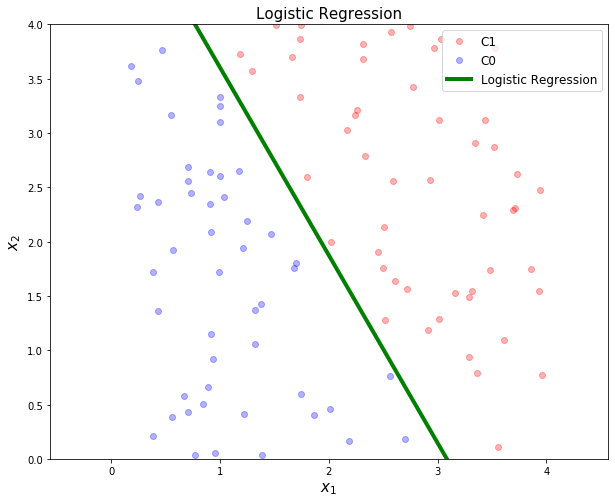

In [21]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

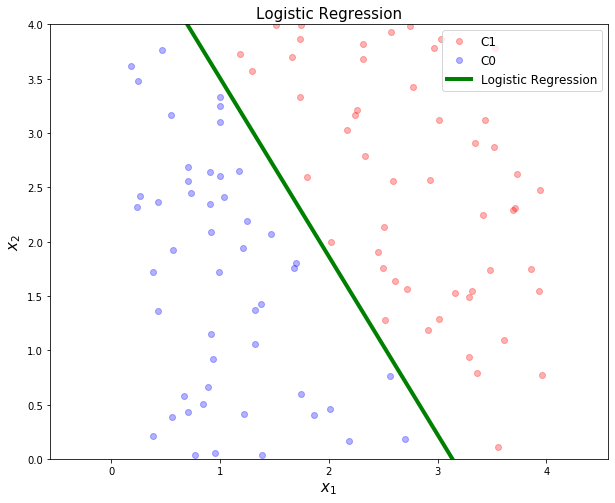

In [22]:
# Logistic Regression using CVXPY
import cvxpy as cvx

w = cvx.Variable([3, 1])

obj = cvx.Maximize(y.T*X*w - cvx.sum(cvx.logistic(X*w)))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

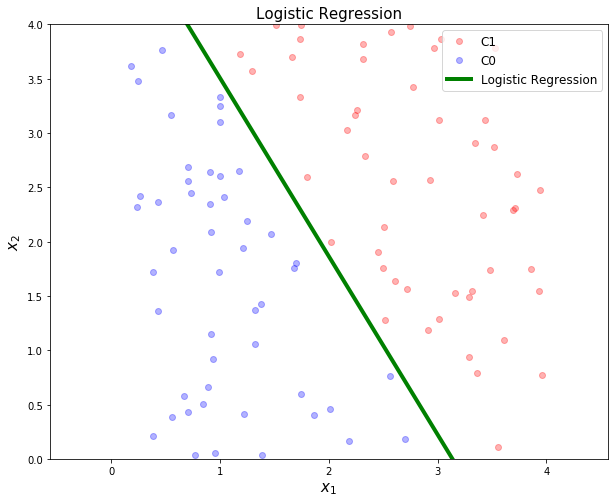

In [25]:
# In a more compact form
y = np.empty([m,1])
y[C1] = 1
y[C0] = -1
y = np.asmatrix(y)

w = cvx.Variable([3, 1])

obj = cvx.Minimize(cvx.sum(cvx.logistic(cvx.multiply(-y, X*w))))
prob = cvx.Problem(obj).solve()

w = w.value
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [26]:
# Logistic Regression using Scikit-Learn
X = X[:,1:3]

X.shape

(100, 2)

In [34]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X,np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clf.coef_

array([[3.16483876, 1.65347161]])

In [36]:
clf.intercept_

array([-9.42170984])

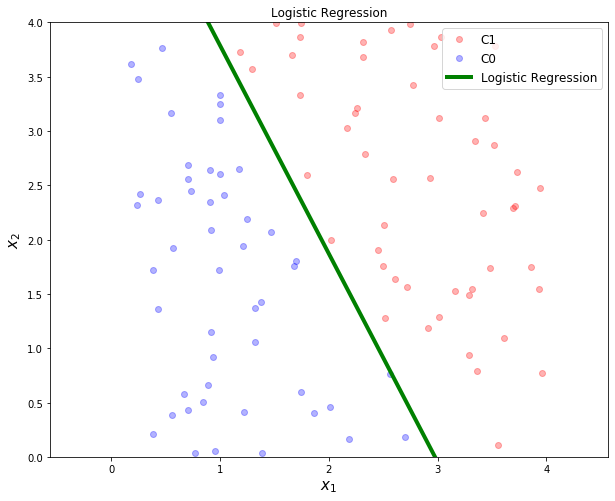

In [37]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

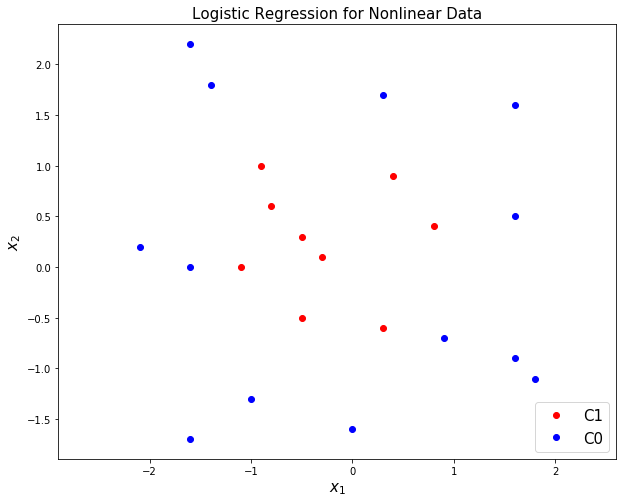

In [38]:
# Non-linear Classification
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('Logistic Regression for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [39]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.sqrt(2)*X[:,0], np.sqrt(2)*X[:,1], np.square(X[:,0]),
               np.sqrt(2)*np.multiply(X[:,0], X[:,1]), np.square(X[:,1])])

w = cvx.Variable([6, 1])
obj = cvx.Minimize(cvx.sum(cvx.logistic(-cvx.multiply(y,Z*w))))
prob = cvx.Problem(obj).solve()

w = w.value

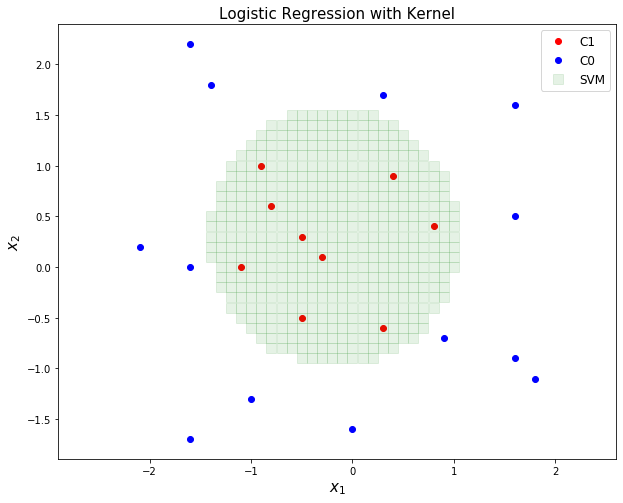

In [42]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.sqrt(2)*Xp[:,0], np.sqrt(2)*Xp[:,1], np.square(Xp[:,0]), 
                np.sqrt(2)*np.multiply(Xp[:,0], Xp[:,1]), np.square(Xp[:,1])])

q = Zp*w

B = []
for i in range(m):
    if q[i,0] > 0:
        B.append(Xp[i,:])       

B = np.vstack(B)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(B[:,0], B[:,1], 'gs', markersize = 10, alpha = 0.1, label = 'SVM')
plt.title('Logistic Regression with Kernel', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()